# Reference: Model Code

3a) human_reward_move

In [3]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from utils import *

In [8]:
import os
path=os.path.join('data','rps_v2_clean.csv')
df = pd.read_csv(path)

In [9]:
df

,game_id,version,is_sona_autocredit,sona_experiment_id,sona_credit_token,sona_survey_code,round_index,player_id,is_bot,bot_strategy,bot_move_probabilities,round_begin_ts,player_move,player_rt,player_outcome,player_outcome_viewtime,player_points,player_total
0,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,1,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,outcome_transition_dual_dependency,{'win': {'0': {'rock': {'rock': 0.049999999999...,1583904283047,rock,2091,tie,3951,0,0
1,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,1,f1c3a029-e381-4f79-afbe-677ef9416f04,1,outcome_transition_dual_dependency,{'win': {'0': {'rock': {'rock': 0.049999999999...,1583904283047,rock,0,tie,0,0,0
2,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,2,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,outcome_transition_dual_dependency,{'win': {'0': {'rock': {'rock': 0.049999999999...,1583904289171,paper,2886,loss,1741,-1,0
3,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,2,f1c3a029-e381-4f79-afbe-677ef9416f04,1,outcome_transition_dual_dependency,{'win': {'0': {'rock': {'rock': 0.049999999999...,1583904289171,scissors,0,win,0,3,0
4,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,3,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,outcome_transition_dual_dependency,{'win': {'0': {'rock': {'rock': 0.049999999999...,1583904293847,scissors,1676,tie,2040,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130195,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,298,aaef3106-84a2-4e42-a31f-4bcaa7c659dd,1,opponent_prev_move_positive,"{'win': {'rock': {'rock': 0.04999999999999999,...",1583712841264,rock,0,loss,0,-1,7
130196,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,299,9abb892e-7543-47bf-a2dc-40b0796b01b7,0,opponent_prev_move_positive,"{'win': {'rock': {'rock': 0.04999999999999999,...",1583712843836,rock,876,loss,1399,-1,398
130197,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,299,aaef3106-84a2-4e42-a31f-4bcaa7c659dd,1,opponent_prev_move_positive,"{'win': {'rock': {'rock': 0.04999999999999999,...",1583712843836,paper,0,win,0,3,6
130198,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,300,9abb892e-7543-47bf-a2dc-40b0796b01b7,0,opponent_prev_move_positive,"{'win': {'rock': {'rock': 0.04999999999999999,...",1583712846189,scissors,1370,win,1481,3,397


In [10]:
# df = read_rps_data()
# df.head()

## add new columns to count the number of each reward
new_df = add_col(df, ['rock_reward', 'paper_reward','scissors_reward',], value =0)
new_df

df = add_col(new_df, ['opponent_move'], value ='')
def get_opponent_move(sub_df):
    """
    fills in the `opponent_move` column
    """
    for i in range(len(sub_df)):
        if i%2 == 0:
            sub_df.at[i, 'opponent_move'] = sub_df.at[i + 1, 'player_move']
        else:
            sub_df.at[i, 'opponent_move'] = sub_df.at[i - 1, 'player_move']
    
    return sub_df

separated = separate_df(df)
for e in separated:
    get_opponent_move(e)
df = pd.concat(separated)
df

,game_id,version,is_sona_autocredit,sona_experiment_id,sona_credit_token,sona_survey_code,round_index,player_id,is_bot,bot_strategy,...,player_move,player_rt,player_outcome,player_outcome_viewtime,player_points,player_total,rock_reward,paper_reward,scissors_reward,opponent_move
0,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,1,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,outcome_transition_dual_dependency,...,rock,2091,tie,3951,0,0,0,0,0,rock
1,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,1,f1c3a029-e381-4f79-afbe-677ef9416f04,1,outcome_transition_dual_dependency,...,rock,0,tie,0,0,0,0,0,0,rock
2,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,2,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,outcome_transition_dual_dependency,...,paper,2886,loss,1741,-1,0,0,0,0,scissors
3,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,2,f1c3a029-e381-4f79-afbe-677ef9416f04,1,outcome_transition_dual_dependency,...,scissors,0,win,0,3,0,0,0,0,paper
4,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,3,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,outcome_transition_dual_dependency,...,scissors,1676,tie,2040,0,-1,0,0,0,scissors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,298,aaef3106-84a2-4e42-a31f-4bcaa7c659dd,1,opponent_prev_move_positive,...,rock,0,loss,0,-1,7,0,0,0,paper
596,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,299,9abb892e-7543-47bf-a2dc-40b0796b01b7,0,opponent_prev_move_positive,...,rock,876,loss,1399,-1,398,0,0,0,paper
597,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,299,aaef3106-84a2-4e42-a31f-4bcaa7c659dd,1,opponent_prev_move_positive,...,paper,0,win,0,3,6,0,0,0,rock
598,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,300,9abb892e-7543-47bf-a2dc-40b0796b01b7,0,opponent_prev_move_positive,...,scissors,1370,win,1481,3,397,0,0,0,paper


In [11]:
# 3 points for a win, 0 for a tie, -1 for a loss
def human_reward_move(sub_df):

    ## number of reward points for each move
    dic_reward={'win':3,'tie':0,'loss':-1}

    ## initialization for each move
    dic_move={'rock':0,'paper':0,'scissors':0}

    ## loop through the human rows
    for i in range(0,len(sub_df),2):

        ## fetch player outcomes
        outcome=sub_df.get('player_outcome').iloc[i]

        ## fetch player moves
        move=sub_df.get('player_move').iloc[i]

        ## avoid all the nans and 'none's in player_move
        if move != 'none'and not pd.isna(move): 

            ## tally all the point associated with rewards
            dic_move[move]+=dic_reward[outcome]

            ## add columns to store reward points
            col_name=move+'_reward'

            ## store reward points in corresponding columns
            sub_df.at[i,'rock_reward']=dic_move['rock']
            sub_df.at[i,'paper_reward']=dic_move['paper']
            sub_df.at[i,'scissors_reward']=dic_move['scissors']

    return sub_df 

separated = separate_df(df)
for e in separated:
    human_reward_move(e)
r = pd.concat(separated)
df=r
df

,game_id,version,is_sona_autocredit,sona_experiment_id,sona_credit_token,sona_survey_code,round_index,player_id,is_bot,bot_strategy,...,player_move,player_rt,player_outcome,player_outcome_viewtime,player_points,player_total,rock_reward,paper_reward,scissors_reward,opponent_move
0,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,1,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,outcome_transition_dual_dependency,...,rock,2091,tie,3951,0,0,0,0,0,rock
1,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,1,f1c3a029-e381-4f79-afbe-677ef9416f04,1,outcome_transition_dual_dependency,...,rock,0,tie,0,0,0,0,0,0,rock
2,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,2,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,outcome_transition_dual_dependency,...,paper,2886,loss,1741,-1,0,0,-1,0,scissors
3,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,2,f1c3a029-e381-4f79-afbe-677ef9416f04,1,outcome_transition_dual_dependency,...,scissors,0,win,0,3,0,0,0,0,paper
4,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,3,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,outcome_transition_dual_dependency,...,scissors,1676,tie,2040,0,-1,0,-1,0,scissors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,298,aaef3106-84a2-4e42-a31f-4bcaa7c659dd,1,opponent_prev_move_positive,...,rock,0,loss,0,-1,7,0,0,0,paper
596,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,299,9abb892e-7543-47bf-a2dc-40b0796b01b7,0,opponent_prev_move_positive,...,rock,876,loss,1399,-1,398,123,147,127,paper
597,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,299,aaef3106-84a2-4e42-a31f-4bcaa7c659dd,1,opponent_prev_move_positive,...,paper,0,win,0,3,6,0,0,0,rock
598,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,300,9abb892e-7543-47bf-a2dc-40b0796b01b7,0,opponent_prev_move_positive,...,scissors,1370,win,1481,3,397,123,147,130,paper


In [12]:

def move_matrix():
        outcomes = pd.DataFrame.from_dict({
        'win':     ['0', '1', '-1'],
        'stay':    ['-1', '0', '1'],
        'loss': ['1', '-1', '0']
        }, orient='index', columns=['win', 'paper', 'scissors'])
        outcomes = np.transpose(outcomes)
        return outcomes
comp_matrix = move_matrix()

def softmax(x, beta = 1):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x * beta) / np.sum(np.exp(x * beta), axis=0)


def get_softmax_probabilities(df, columns):
    distribution = []
    vals = df[columns]
    for i in range(df.shape[0]):
        soft_max = softmax(vals.iloc[i], beta = 4).tolist() # add aggressive beta term to make max probability move more likely
        distribution.append(soft_max)
    dist = np.array(distribution)
    sofm = pd.DataFrame(dist, columns = ['softmax_prob_rock', 'softmax_prob_paper', 'softmax_prob_scissors'])
    
    return sofm


def pick_move(df, sofm):
    moves = np.array([])
    for i in range(df.shape[0]):
        move_choices = ['rock', 'paper', 'scissors']
        distribution = sofm.iloc[i].tolist() # get ith [rock_prob,paper_prob,scissors_prob] from input df 
        # https://www.w3schools.com/python/ref_random_choices.asp
        # can also use other sample function
        chosen_move = random.choices(move_choices, distribution) 
        moves = np.append(moves, chosen_move)
    df = df.assign(agent_move = moves) # agent_move stores sampled moves
    return df

# from utils.py
OUTCOME_LOOKUP = np.transpose(
    pd.DataFrame.from_dict({
        'rock':     ['tie', 'lose', 'win'],
        'paper':    ['win', 'tie', 'lose'],
        'scissors': ['lose', 'win', 'tie']
    }, orient='index', columns=['rock', 'paper', 'scissors']))

def evaluate_outcome(player_move, opponent_move):
    """
    TODO check that both moves are in outcome lookup
    """
    OUTCOME_LOOKUP = np.transpose(
    pd.DataFrame.from_dict({
        'rock':     ['tie', 'lose', 'win'],
        'paper':    ['win', 'tie', 'lose'],
        'scissors': ['lose', 'win', 'tie']
    }, orient='index', columns=['rock', 'paper', 'scissors']))
    
    return OUTCOME_LOOKUP[player_move][opponent_move]


def assign_agent_outcomes(df):
    """
    Assign outcomes for the agent based on agent move choices.
    df should include only human rows, since agent outcomes are irrelevant for simulating bots
    """
    # df.assign(agent_outcome = '')
    df['agent_outcome'] = df.apply(lambda x: evaluate_outcome(x['agent_move'], x['opponent_move']), axis=1)
    return df

# here, 2, 3, 1 would be the values in `rock_reward`, `paper_reward`, `scissors_reward`
softmax([2, 3, 1])

# agent_move column stores simulated move
# agent_outcome stores outcome of simulated agent move and opponent move
df=add_col(df,['agent_move','agent_outcome'],value="")

# code from the original model: 
soft_dist = get_softmax_probabilities(
    df, # df should be just human rows at this point, strip out nans etc. 
    ['rock_reward', 'paper_reward', 'scissors_reward']
)


# Select agent move based on softmax computed above (1 min.)
'''
ONLY want to pick move for human row right? generate agent_outcome for human rows?
so need a for i in range(2,len(df),2)
'''
df = pick_move(df, soft_dist) 

# # Evaluate outcome of agent move choices in simulation above
# df = assign_agent_outcomes(df)

def assign_agent_outcomes(df):
    """
    Assign outcomes for the agent based on agent move choices.
    df should include only human rows, since agent outcomes are irrelevant for simulating bots
    """
    # df.assign(agent_outcome = '')
    df['agent_outcome'] = df.apply(lambda x: evaluate_outcome(x['agent_move'], x['opponent_move']), axis=1)
    return df


df_3a=df[df['is_bot']!=1]

df_3a['agent_outcome']=df_3a.apply(lambda x: evaluate_outcome(x['agent_move'],x['opponent_move']), axis=1)


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/tm/sjjwcmbs3250mhfs5psrzf5w0000gn/T/ipykernel_87749/3050211172.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3a['agent_outcome']=df_3a.apply(lambda x: evaluate_outcome(x['agent_move'],x['opponent_move']), axis=1)


/var/folders/tm/sjjwcmbs3250mhfs5psrzf5w0000gn/T/ipykernel_87749/2958750840.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)


<AxesSubplot:title={'center':'Win percentage against bot strategies'}, xlabel='Trial round', ylabel='Mean win percentage'>

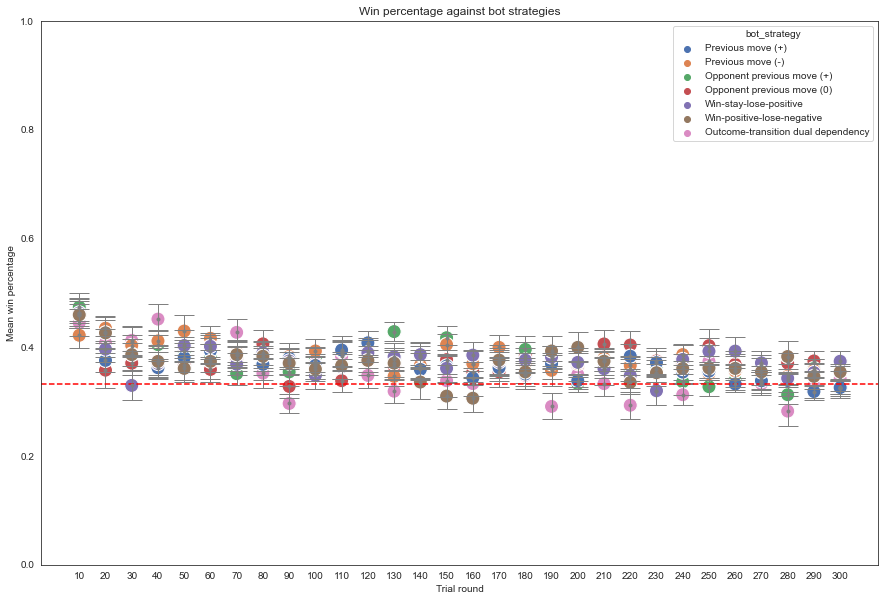

In [13]:

N_ROUNDS = 300
def groupby_f_data(f_data, colname, bins):
    """
    group by filtered data with player outcome and calculate the win percentage
    colname will be either 'player_outcome' or 'agent_outcome' for plotting human or agent results
    """
    modified_f_data = f_data.dropna()
    labs = [str(int(round(a * (N_ROUNDS / bins), 0))) for a in range(1, bins + 1)]
    modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
    grouped_data = modified_f_data[['bot_strategy', 'player_id','bin', colname]].groupby(
        ['bot_strategy', 'player_id', 'bin'])[colname].value_counts('count').rename('pct').reset_index()
    
    return grouped_data


def win_summary(grouped_data, colname):
    """
    filter out the win data and add mean, SD, and SEM
    colname will be either 'player_outcome' or 'agent_outcome' for plotting human or agent results
    """
    win_data = grouped_data[grouped_data[colname] == 'win'].reset_index()
    win_summary = win_data[['bot_strategy', 'bin', 'pct']].groupby(
        ['bot_strategy', 'bin'])['pct'].agg(
            [np.mean, np.std, stats.sem]).reset_index()
    
    return win_summary


def plot_win_rates(data):
    """
    generate plot displaying win rates against each bot, binned by rounds
    """
    sns.set_style(style='white')
    data['bot_strategy'] = data['bot_strategy'].replace([
        'prev_move_positive', 'prev_move_negative', 
        'opponent_prev_move_positive', 'opponent_prev_move_nil',
        'win_nil_lose_positive', 'win_positive_lose_negative',
        'outcome_transition_dual_dependency'
    ],
    [
        'Previous move (+)', 'Previous move (-)',
        'Opponent previous move (+)', 'Opponent previous move (0)',
        'Win-stay-lose-positive', 'Win-positive-lose-negative',
        'Outcome-transition dual dependency'
    ])
    
    f, ax = plt.subplots(figsize=(15, 10))
    g = sns.scatterplot(
        x = "bin", y = "mean", hue = "bot_strategy", 
        hue_order = [
            'Previous move (+)', 'Previous move (-)',
            'Opponent previous move (+)', 'Opponent previous move (0)',
            'Win-stay-lose-positive', 'Win-positive-lose-negative',
            'Outcome-transition dual dependency'
        ],
        palette="deep", s = 200, ax = ax, data = data)
    
    plt.errorbar(data.get('bin'), data.get('mean'), yerr = data.get('sem'), 
        fmt = '.', ecolor='0.5', color='0.5',
        capsize = 10 , elinewidth = 1, capthick = 1)
    plt.ylim(0, 1.0)
    plt.title('Win percentage against bot strategies')
    plt.xlabel('Trial round')
    plt.ylabel('Mean win percentage')
    plt.axhline(y = 1/3, color = 'r', linestyle = '--')
    
    return g

plot_win_rates(win_summary(groupby_f_data(df_3a,'agent_outcome',30),'agent_outcome'))
